# Prerequisite
* Load required packages and load images (already uploaded on  Blackboard) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Submit the demo on Blackboard by Mar 22, 2023 in **.ipynb** format.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY following numpy and tensorflow/pytorch functions for any operations**



In [ ]:
import tensorflow as tf
import numpy as np
from scipy import ndimage as nd
from scipy import interpolate as inter
from matplotlib import pyplot as plt
import imageio.v2 as imageio

Original Data_type is uint8
Data_type is float32
Image Size is (1376, 1376)
Image min and max are (0.0, 253.0)


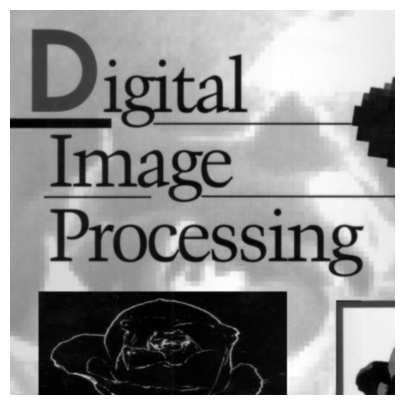

In [ ]:
img_path = '/content/book_image_orig.tif'
img_a0 = imageio.imread(img_path)
img_a = img_a0.astype(np.float32)
### Image Padding ##################################
### To avoid Artifacts (You can try removing it) ###
pad_sz = [344,344]
x_slice = slice(pad_sz[0],-pad_sz[0])
y_slice = slice(pad_sz[1],-pad_sz[1])
img_a = np.pad(img_a,(pad_sz[0],pad_sz[0]))
#####################################################

print('Original Data_type is {}'.format(img_a0.dtype))
print('Data_type is', img_a.dtype)
print('Image Size is {}'.format(img_a.shape))
print('Image min and max are ({}, {})'.format(img_a.min(),img_a.max()))
#################################################
plt.figure(figsize=(5,5))
plt.imshow(img_a[x_slice,y_slice], cmap='gray')
plt.axis('off')
plt.show()

FFT Data_type is complex128
FFT Size is (1376, 1376)
FFT min and max are ((-42535116.25958506-11427994.767764794j), (65241244+0j))
mod-FFT Data_type is float64
mod-FFT Size is (1376, 1376)
mod-FFT min and max are (0.6340369484376687, 65241244.0)
log mod-FFT min and max are (0.7084406057143952, 25.959280977502715)
lm-FFT Data_type is float64
mod-FFT Size is (1376, 1376)
mod-FFT min and max are (0.0, 255.0)


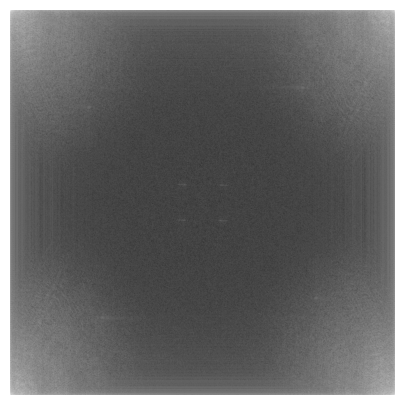

In [ ]:
img_b = np.fft.fft2(img_a)
#################################################
print('FFT Data_type is {}'.format(img_b.dtype))
print('FFT Size is {}'.format(img_b.shape))
print('FFT min and max are ({}, {})'.format(img_b.min(),img_b.max()))
#################################################
img_b_mod = np.abs(img_b)
#################################################
print('mod-FFT Data_type is {}'.format(img_b_mod.dtype))
print('mod-FFT Size is {}'.format(img_b_mod.shape))
print('mod-FFT min and max are ({}, {})'.format(img_b_mod.min(),img_b_mod.max()))
print('log mod-FFT min and max are ({}, {})'.format(np.log2(1+img_b_mod.min()),np.log2(1+img_b_mod.max()) ))
#################################################
min_lb = np.log2(1+img_b_mod.min())
max_lb = np.log2(1+img_b_mod.max())

img_b_lm = np.log2(1+img_b_mod)
img_c = (img_b_lm-min_lb) / (max_lb - min_lb)
img_c = 255.0*img_c
#################################################
print('lm-FFT Data_type is {}'.format(img_c.dtype))
print('mod-FFT Size is {}'.format(img_c.shape))
print('mod-FFT min and max are ({}, {})'.format(img_c.min(),img_c.max()))
#################################################
plt.figure(figsize=(5,5))
plt.imshow(img_c, cmap='gray')
plt.axis('off')
plt.show()

shift-FFT Data_type is complex128
shift-FFT Size is (1376, 1376)
shift-FFT min and max are ((-42535116.25958506-11427994.767764794j), (65241244+0j))
shift-lm-FFT Data_type is float64
shift-mod-FFT Size is (1376, 1376)
shift-mod-FFT min and max are (0.0, 255.0)


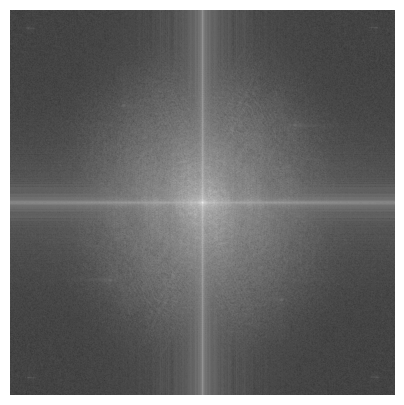

In [ ]:
img_fft_a = np.fft.fft2(img_a)
img_d = np.fft.fftshift(img_fft_a)
#################################################
print('shift-FFT Data_type is {}'.format(img_d.dtype))
print('shift-FFT Size is {}'.format(img_d.shape))
print('shift-FFT min and max are ({}, {})'.format(img_d.min(),img_d.max()))
#################################################
img_d_mod = np.abs(img_d)
min_ld = np.log2(1+img_d_mod.min())
max_ld = np.log2(1+img_d_mod.max())

img_d_lm = np.log2(1+img_d_mod)
img_e = (img_d_lm-min_ld) / (max_ld - min_ld)
img_e = 255.0*img_e
#################################################
print('shift-lm-FFT Data_type is {}'.format(img_e.dtype))
print('shift-mod-FFT Size is {}'.format(img_e.shape))
print('shift-mod-FFT min and max are ({}, {})'.format(img_e.min(),img_e.max()))
#################################################
plt.figure(figsize=(5,5))
plt.imshow(img_e, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
[M, N] = img_b.shape
[vv,uu] = np.meshgrid(range(N), range(M))
uu = (uu) - 0.5*M
vv = (vv) - 0.5*N
print(vv/N)
print(uu/M)

[[-0.5        -0.49927326 -0.49854651 ...  0.49781977  0.49854651
   0.49927326]
 [-0.5        -0.49927326 -0.49854651 ...  0.49781977  0.49854651
   0.49927326]
 [-0.5        -0.49927326 -0.49854651 ...  0.49781977  0.49854651
   0.49927326]
 ...
 [-0.5        -0.49927326 -0.49854651 ...  0.49781977  0.49854651
   0.49927326]
 [-0.5        -0.49927326 -0.49854651 ...  0.49781977  0.49854651
   0.49927326]
 [-0.5        -0.49927326 -0.49854651 ...  0.49781977  0.49854651
   0.49927326]]
[[-0.5        -0.5        -0.5        ... -0.5        -0.5
  -0.5       ]
 [-0.49927326 -0.49927326 -0.49927326 ... -0.49927326 -0.49927326
  -0.49927326]
 [-0.49854651 -0.49854651 -0.49854651 ... -0.49854651 -0.49854651
  -0.49854651]
 ...
 [ 0.49781977  0.49781977  0.49781977 ...  0.49781977  0.49781977
   0.49781977]
 [ 0.49854651  0.49854651  0.49854651 ...  0.49854651  0.49854651
   0.49854651]
 [ 0.49927326  0.49927326  0.49927326 ...  0.49927326  0.49927326
   0.49927326]]


In [ ]:
PI = np.pi
A=0.02
B=0.02
T = 1
# A=0.0003
# B=0.0003
# T = 1

#print(PI)
sinc01 = np.sinc(PI*((uu)*A+(vv)*B))
ej = np.exp(-(1j)*PI*((uu)*A+(vv)*B))

H = T*(sinc01)*ej

img_fft_filt_shifted = img_d*H   # Motion Blur Filter is applied to shifted DFT
img_fft_filt = np.fft.ifftshift(img_fft_filt_shifted) # IFFTshift

(-0.10237411805318994-0.07437915053268374j) (1+0j)


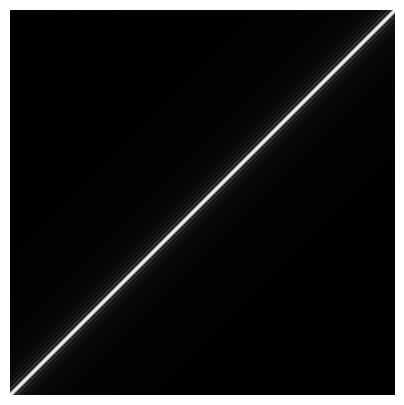

In [ ]:
H_spec = np.abs(H)
print(H.min(),H.max())
plt.figure(figsize=(5,5))
plt.imshow(H_spec, cmap='gray')
plt.axis('off')
plt.show()

(-0.20818284676153961+0.00024527800276465155j) (250.60294227744325-0.0005559784937312763j)


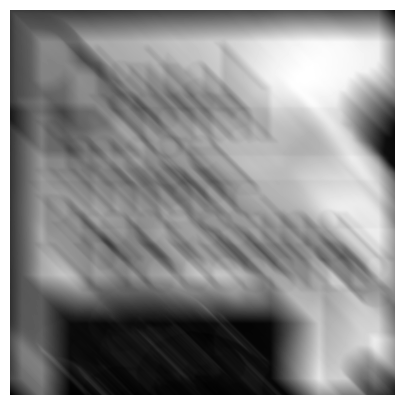

In [ ]:
img_low = np.fft.ifft2(img_fft_filt)
print(img_low.min(),img_low.max())
img_low_mod = np.abs(img_low)
plt.figure(figsize=(5,5))
plt.imshow(img_low_mod[x_slice,y_slice], cmap='gray')
plt.axis('off')
plt.show()

#Q1) Wiener Filter

##a) Show the Shifted Fourier Transform of previous motion blured image **[2 Marks]**

In [ ]:
img_mblur = img_low_mod

##b) Calculate and Show Wiener Filter using $H(u,v)$ Provided. Tune $K$ accordingly and report.
##**[4 Marks]**

##c) Kindly apply Wiener filter on shifted Fourier trasform of motion blurred image. Reconstruct the image back and Show the image. **[4 Marks]**

#Q2)  Kindly apply Wiener filter on shifted Fourier trasform of motion blurred image 'book_image_least_noise.tif'. Reconstruct the image back and Show the image. **[10 Marks]**